---
# **Analysis Of PostMalone Data Set**:

### **Team Information**

1. Aayush Chaturvedi - Aayush.Chaturvedi@adypu.edu.in
2. Veeramalla Saiteja - veeramalla.saiteja@adypu.edu.in
3. Ashvin Tiwari - Ashvin.K@adypu.edu.in
4. Abhinav Vinod Bhusagare - Abhinav.Bhusagare@adypu.edu.in

---

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

### ***Loading the Data Set***

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/EDA_Datasets/PostMalone.csv")
df

,Artist,Title,Album,Year,Date,Lyric
0,Post Malone,​​rockstar,beerbongs & bentleys,2017.0,2017-09-15,post malone hahahahaha tank god ayy ayy post...
1,Post Malone,White Iverson,Stoney (Deluxe),2015.0,2015-02-04,double ot i'm a new three saucin' saucin' i'...
2,Post Malone,Congratulations,Stoney (Deluxe),2016.0,2016-11-04,post malone mmmmm yeah yeah mmmmm yeah hey p...
3,Post Malone,Psycho,beerbongs & bentleys,2018.0,2018-02-23,post malone damn my ap goin' psycho lil' mama ...
4,Post Malone,I Fall Apart,Stoney (Deluxe),2016.0,2016-12-09,ooh i fall apart ooh yeah mmm yeah she told ...
...,...,...,...,...,...,...
143,Post Malone,Lithium,NaN,2020.0,2020-04-24,i'm so happy 'cause today i found my friends t...
144,Post Malone,Something in the Way,NaN,2020.0,2020-04-24,verse underneath the tarp has sprung a leak a...
145,Post Malone,In Bloom,NaN,2020.0,2020-04-24,sell the kids for food weather changes moods s...
146,Post Malone,Territorial Pissings,NaN,2020.0,2020-04-24,when i was an alien cultures weren't opinions ...


## **Basic Information**

### ***Checking Missing Values***

In [ ]:
print("\n=== Missing Values ===")
print(df.isna().sum())


=== Missing Values ===
Artist     0
Title      0
Album     42
Year      46
Date      46
Lyric      0
dtype: int64


### ***Stats for numerical columns***

In [ ]:
print("\n=== Numerical Summary ===")
print(df.describe())


=== Numerical Summary ===
              Year
count   102.000000
mean   2017.147059
std       1.910871
min    2013.000000
25%    2016.000000
50%    2017.000000
75%    2019.000000
max    2020.000000


### ***Unique Counts***

In [ ]:
print("\n=== Unique Counts ===")
print(f"Albums: {df['Album'].nunique()}")
print(f"Songs: {df['Title'].nunique()}")
print(f"Years: {df['Year'].nunique()}")


=== Unique Counts ===
Albums: 7
Songs: 148
Years: 8


---

# **Zipf's Law:**


1. *Function to clean text (filter punctuation)*

In [ ]:
def clean_text(text):
    words = re.findall(r"(?<!\S)[a-z']+(?!\S)|(?<!\S)[a-z']+(?=\S*'[a-z])", str(text).lower())
    return [word for word in words if word.replace("'", "").isalpha()]

2. *Clean and count words*

In [ ]:
all_words = []
for lyrics in df['Lyric']:
  all_words.extend(clean_text(lyrics))

In [ ]:
word_counts = Counter(all_words)
counts_sorted_by_frequency = word_counts.most_common()

3. *Creating a frequency DataFrame*

In [ ]:
freq_df = pd.DataFrame(counts_sorted_by_frequency, columns=['Word', 'Frequency'])
freq_df['Rank'] = range(1, len(freq_df) + 1)

### 4. **Plotting Expected and Observed LogLog Scale Graph**

In [ ]:
max_freq = freq_df['Frequency'].iloc[0]
freq_df['Zipf_Expected'] = max_freq / freq_df['Rank']

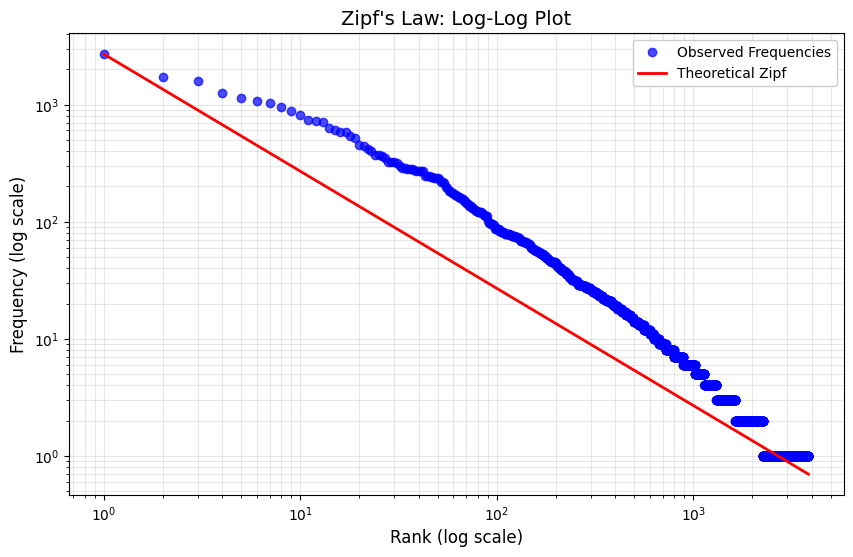

In [ ]:
# Log-log plot with side annotation
plt.figure(figsize=(10, 6))
plt.loglog(freq_df['Rank'], freq_df['Frequency'],
           'bo', markersize=6, alpha=0.7, label='Observed Frequencies')
plt.loglog(freq_df['Rank'], freq_df['Zipf_Expected'],
           'r-', linewidth=2, label='Theoretical Zipf')

plt.xlabel('Rank (log scale)', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.title("Zipf's Law: Log-Log Plot", fontsize=14)
plt.legend(fontsize=10, framealpha=1, loc='upper right')
plt.grid(True, which="both", ls="-", alpha=0.3)

plt.show()

### 5. **Plotting Expected and Observed Linear Scale Graph**

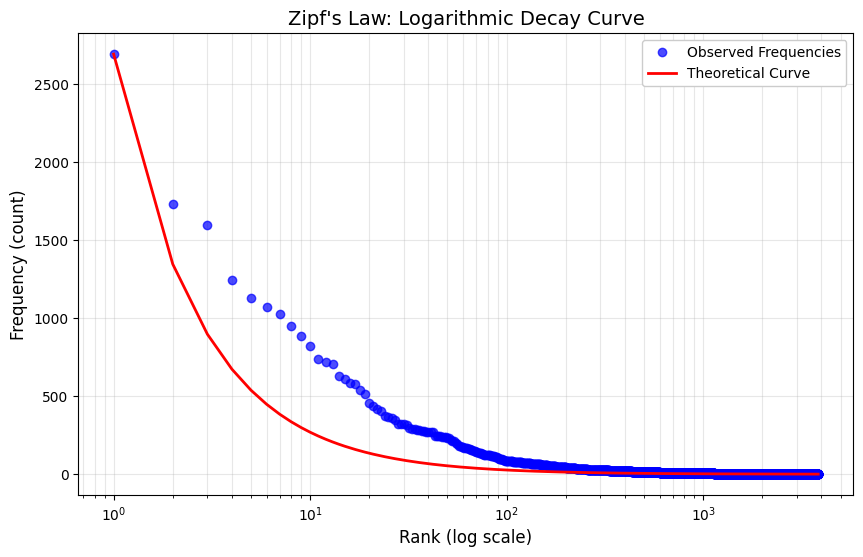

In [ ]:
# Linear-scale plot (Logarithmic Decay Curve)
plt.figure(figsize=(10, 6))
plt.plot(freq_df['Rank'], freq_df['Frequency'],
         'bo', markersize=6, alpha=0.7, label='Observed Frequencies')
plt.plot(freq_df['Rank'], freq_df['Zipf_Expected'],
         'r-', linewidth=2, label='Theoretical Curve')

# Configure axes
plt.xscale('log')  # Only rank is logarithmic
plt.yscale('linear')  # Frequency in normal scale

plt.xlabel('Rank (log scale)', fontsize=12)
plt.ylabel('Frequency (count)', fontsize=12)
plt.title("Zipf's Law: Logarithmic Decay Curve", fontsize=14)
plt.legend(fontsize=10, framealpha=1)
plt.grid(True, which="both", ls="-", alpha=0.3)

plt.show()

---

# **Insights**

### ***Yearly Release Distribution***

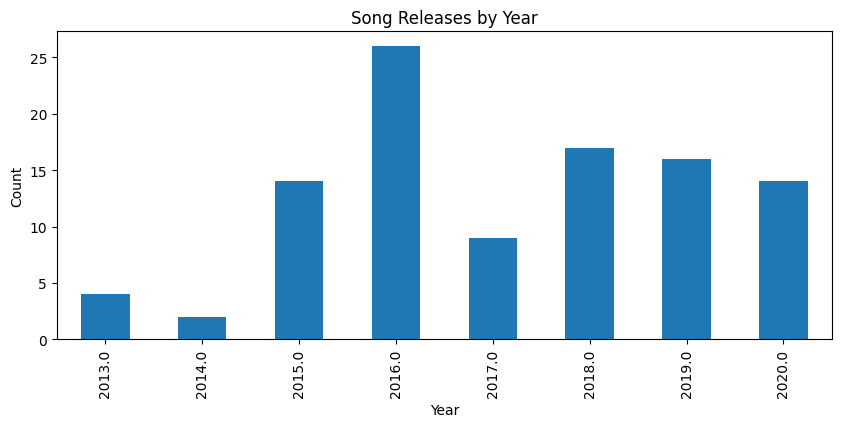

In [ ]:
plt.figure(figsize=(10, 4))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Song Releases by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### ***Album Analysis***

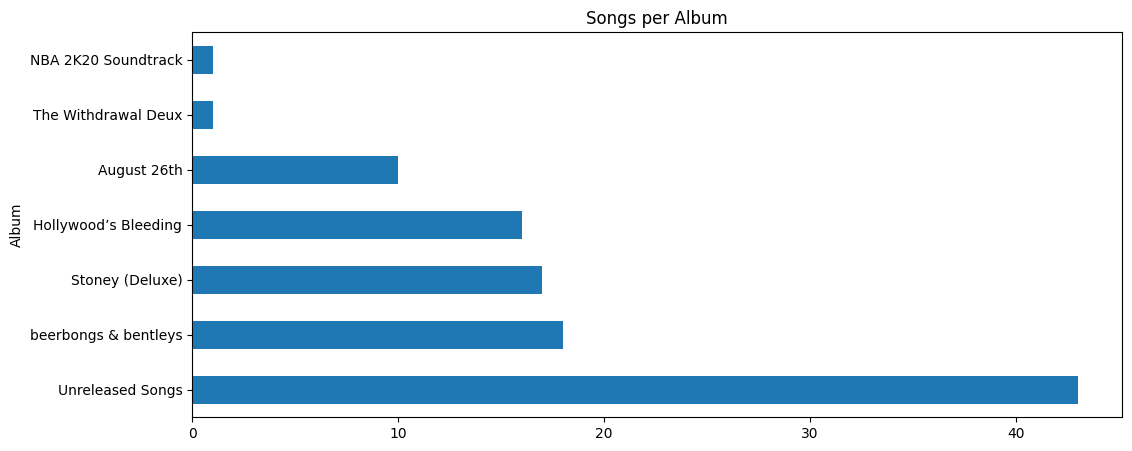

In [ ]:
plt.figure(figsize=(12, 5))
df['Album'].value_counts().plot(kind='barh')
plt.title('Songs per Album')
plt.show()

### ***Lexical Diversity (Vocabulary richness per album)***

<Axes: ylabel='Album'>

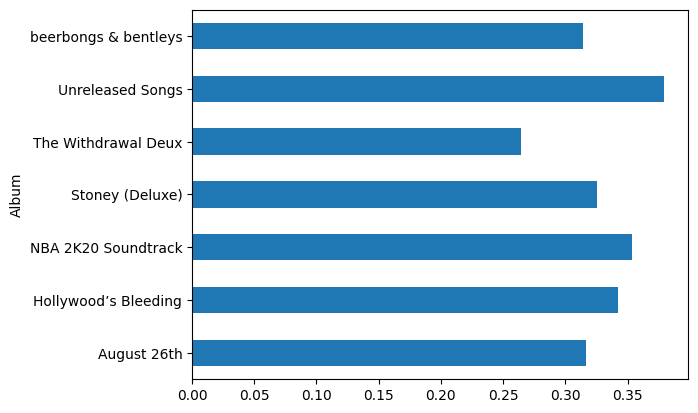

In [ ]:
def lexical_diversity(text):
    words = str(text).split()
    return len(set(words)) / len(words) if words else 0

df['Diversity'] = df['Lyric'].apply(lexical_diversity)
df.groupby('Album')['Diversity'].mean().plot(kind='barh')

### ***Preferred Release Months***

<Axes: title={'center': 'Song Releases by Month'}, xlabel='Month'>

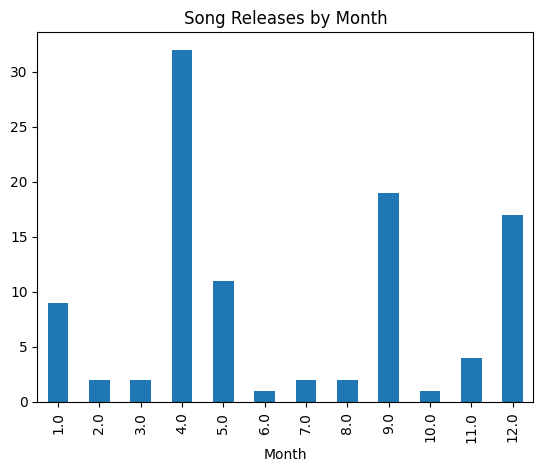

In [ ]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Month'].value_counts().sort_index().plot(kind='bar', title='Song Releases by Month')

### ***Word Statistics***

In [ ]:
total_words = len(all_words)
unique_words = len(word_counts)
avg_words_per_song = total_words / len(df)

print(f"\n=== Lyrics Analysis ===")
print(f"Total words: {total_words:,}")
print(f"Unique words: {unique_words:,}")
print(f"Avg words per song: {avg_words_per_song:.0f}")


=== Lyrics Analysis ===
Total words: 58,109
Unique words: 3,849
Avg words per song: 393


### ***Word Length Distribution***

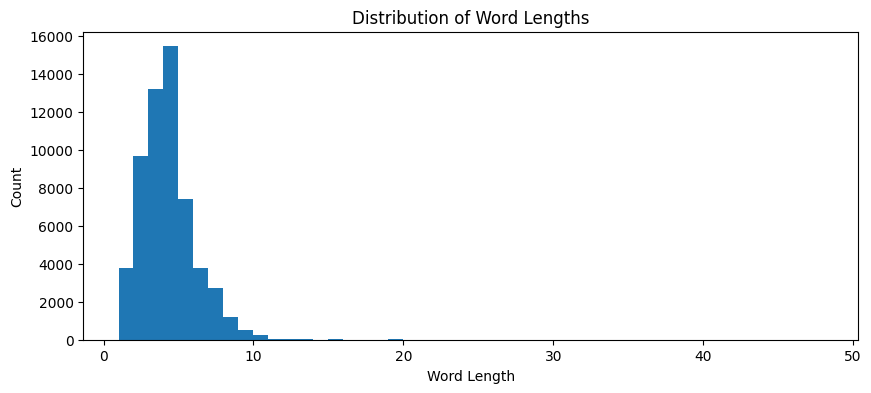

In [ ]:
word_lengths = [len(w) for w in all_words]
plt.figure(figsize=(10, 4))
plt.hist(word_lengths, bins=range(1, max(word_lengths) + 1))
plt.title('Distribution of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Count')
plt.show()

### ***Top 20 Words***

In [ ]:
print("\nTop 20 Most Frequent Words:")
print(freq_df.head(20).to_markdown())


Top 20 Most Frequent Words:
|    | Word   |   Frequency |   Rank |   Zipf_Expected |
|---:|:-------|------------:|-------:|----------------:|
|  0 | i      |        2692 |      1 |        2692     |
|  1 | you    |        1732 |      2 |        1346     |
|  2 | the    |        1600 |      3 |         897.333 |
|  3 | my     |        1245 |      4 |         673     |
|  4 | me     |        1130 |      5 |         538.4   |
|  5 | a      |        1071 |      6 |         448.667 |
|  6 | and    |        1026 |      7 |         384.571 |
|  7 | yeah   |         949 |      8 |         336.5   |
|  8 | on     |         885 |      9 |         299.111 |
|  9 | it     |         821 |     10 |         269.2   |
| 10 | to     |         740 |     11 |         244.727 |
| 11 | that   |         719 |     12 |         224.333 |
| 12 | i'm    |         705 |     13 |         207.077 |
| 13 | in     |         629 |     14 |         192.286 |
| 14 | up     |         610 |     15 |         179.467 |
| 

### ***Top Words Visualisation***

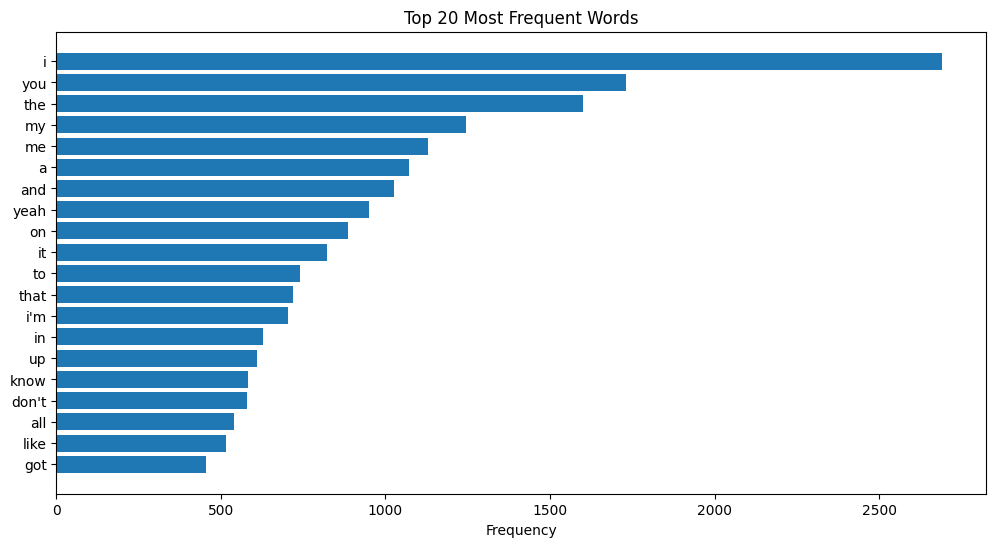

In [ ]:
top_words = freq_df.head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_words['Word'], top_words['Frequency'])
plt.gca().invert_yaxis()
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.show()

---

## **Team Contribution**

* Python Notebook Creation and Dataset Cleaning - Aayush Chaturvedi & Veeramalla Saiteja

* PPT Creation and Designing - Ashvin Tiwari & Abhinav Vinod Bhusagare